<a href="https://colab.research.google.com/github/fxrdhan/Clustering-Case-Study-Exercise/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib yellowbrick scikit-learn

# Import Library

In [2]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# Data Loading

In [3]:
# Membaca dataset pelanggan mall dari URL dan menampilkan 5 baris pertama
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/ML%20Pemula/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Dari hasil output `df.info()`, kita dapat melihat bahwa dataset ini terdiri atas 200 baris dan 5 kolom. Berikut adalah detail dari setiap kolom:**

* **CustomerID:** Ini berisi ID unik untuk setiap pelanggan, bertipe data `int64`.
* **Gender:** Ini menunjukkan jenis kelamin pelanggan, bertipe data `object` (kategori).
* **Age:** Ini menampilkan usia pelanggan dalam tahun, bertipe data `int64`.
* **Annual Income (k$):** Ini berisi pendapatan tahunan pelanggan dalam ribuan dolar, bertipe data `int64`.
* **Spending Score (1-100):** Ini menunjukkan skor pengeluaran pelanggan, mulai dari 1 hingga 100, bertipe data `int64`.

In [5]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Berdasarkan hasil statistik deskriptif yang ditampilkan oleh `df.describe()`, kita dapat melihat beberapa informasi penting mengenai kolom-kolom numerik dalam dataset.**

**CustomerID**

* Ini terdiri dari 200 data unik dengan nilai rata-rata 100.5.
* ID pelanggan bervariasi dari 1 hingga 200.

**Age (Usia)**

* Usia pelanggan berkisar antara 18 hingga 70 tahun dengan rata-rata 38.85 tahun.
* Sebagian besar pelanggan berada pada rentang usia 28.75 hingga 49 tahun (kuartil ke-1 hingga ke-3).

**Annual Income (k$) (Pendapatan Tahunan)**

* Pendapatan tahunan pelanggan bervariasi antara 15 hingga 137 ribu dolar dengan rata-rata 60.56 ribu dolar.
* Sebagian besar pelanggan memiliki pendapatan tahunan antara 39.75 hingga 78 ribu dolar (kuartil ke-1 hingga ke-3).

**Spending Score (1-100)**

* Skor pengeluaran pelanggan bervariasi antara 1 hingga 99 dengan rata-rata 50.2.
* Sebagian besar pelanggan memiliki skor pengeluaran antara 34.75 hingga 73 (kuartil ke-1 hingga ke-3).

# Exploratory Data Analysis

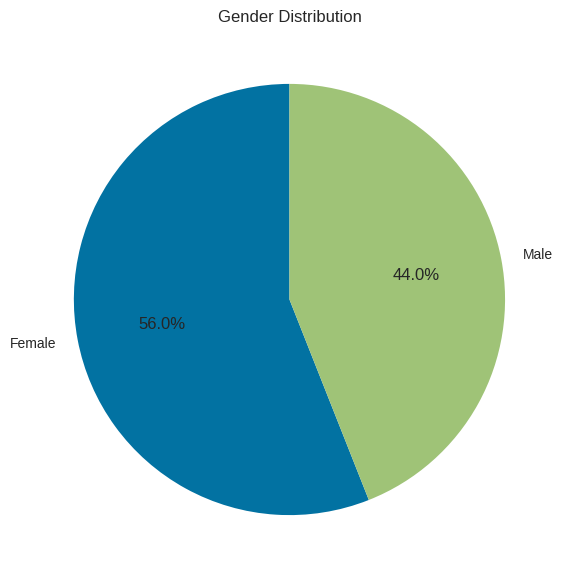

In [6]:
# Menghitung distribusi gender dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

**Dari pie chart yang ditampilkan, kita dapat ketahui bahwa persentase perempuan lebih besar dibandingkan laki-laki dengan proporsi:**

* **Perempuan:** 56%
* **Laki-laki:** 44%

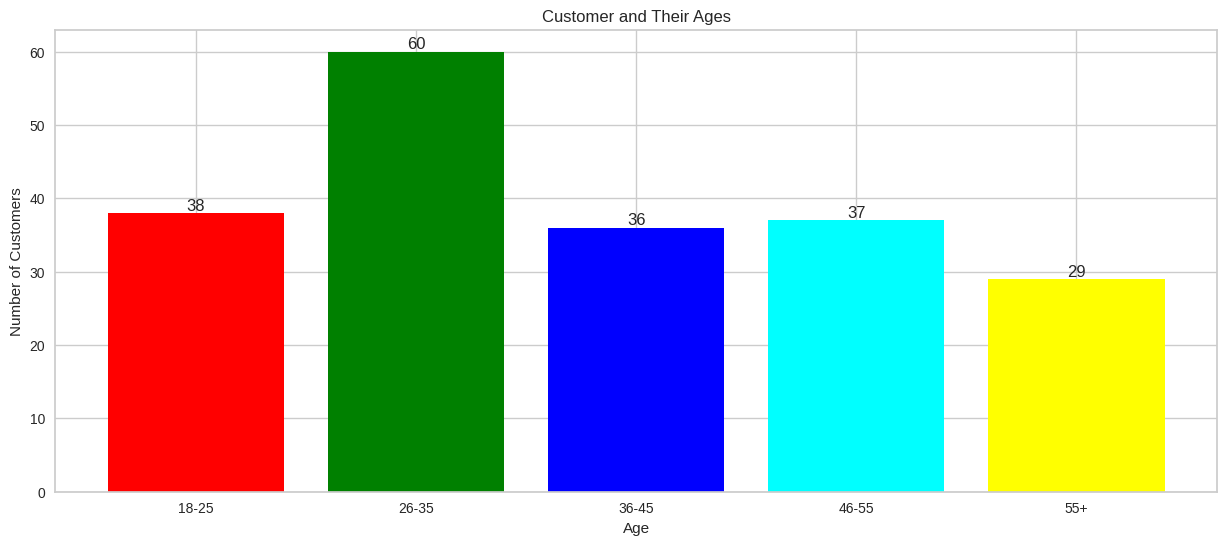

In [7]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()


**Distribusi Usia Pelanggan:**

Berikut adalah visualisasi distribusi usia pelanggan berdasarkan kategori yang telah ditentukan:

| Rentang Usia | Jumlah Pelanggan |
|---|---|
| 18–25 tahun | 38 |
| 26–35 tahun | 60 |
| 36–45 tahun | 36 |
| 46–55 tahun | 37 |
| 55 tahun ke atas | 29 |


**Kesimpulan:**

Visualisasi ini menunjukkan bahwa:

* **Kelompok usia 26–35 tahun adalah yang terbesar di antara pelanggan.**
* **Kelompok usia 55 tahun ke atas memiliki jumlah pelanggan paling sedikit.**
* Distribusi usia pelanggan cenderung menurun setelah usia 35 tahun.

**Analisis Distribusi Pendapatan Tahunan Pelanggan**

Untuk menganalisis distribusi pendapatan tahunan pelanggan, kita mengelompokkan pendapatan ke dalam lima rentang berikut:

| Rentang Pendapatan | Kategori |
|---|---|
| \$0–\$30,000 | 1 |
| \$30,001–\$60,000 | 2 |
| \$60,001–\$90,000 | 3 |
| \$90,001–\$120,000 | 4 |
| \$120,001–\$150,000 | 5 |

Jumlah pelanggan dalam setiap kategori kemudian divisualisasikan melalui bar chart.

**Interpretasi Bar Chart:**

* Grafik ini memperlihatkan jumlah pelanggan dalam setiap rentang pendapatan.
* Setiap kategori pendapatan diwakili oleh warna berbeda pada bar chart.
* Dengan mengamati bar chart, kita dapat memahami distribusi pelanggan berdasarkan pendapatan tahunan mereka.

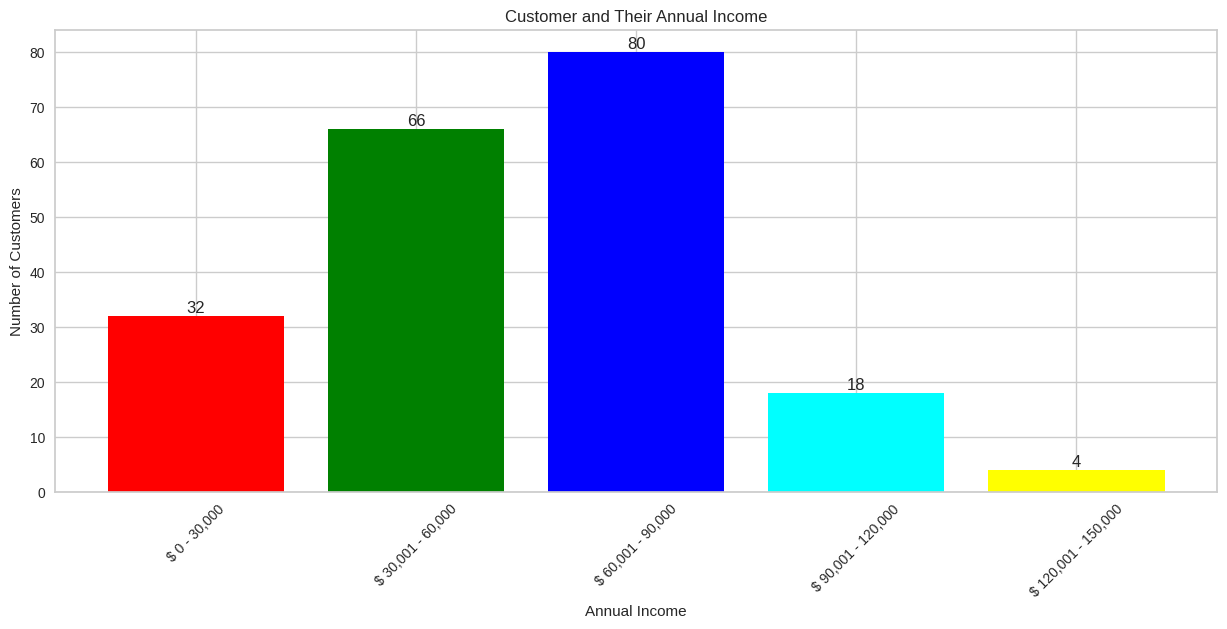

In [8]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

# Menyusun data untuk plotting
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

**Distribusi Pendapatan Tahunan Pelanggan:**

Hasil visualisasi menunjukkan distribusi pendapatan tahunan pelanggan sebagai berikut:

| Rentang Pendapatan | Jumlah Pelanggan |
|---|---|
| \$0–\$30,000 | 32 |
| \$30,001–\$60,000 | 66 |
| \$60,001–\$90,000 | 80 |
| \$90,001–\$120,000 | 18 |
| \$120,001–\$150,000 | 4 |

**Kesimpulan:**

* **Pelanggan paling banyak berada dalam rentang pendapatan \$60,001–\$90,000.**
* **Kategori dengan jumlah pelanggan paling sedikit adalah \$120,001–\$150,000.**
* Bar chart menunjukkan bahwa sebagian besar pelanggan memiliki pendapatan tahunan antara \$30,001 dan \$90,000.

# Data Splitting

Berikut adalah hasil variabel X yang terdiri dari 2 kolom, yaitu Annual Income (k$) dan Spending Score (1-100).

In [9]:
# Mengambil kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' dari dataset dan menyimpannya dalam array X
X = df.iloc[:, [3, 4]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


# Elbow Method

Dengan menggunakan elbow method, kita akan menggambar grafik WCSS terhadap jumlah cluster dan mencari "siku" pada grafik tersebut. Titik letak penurunan WCSS mulai melambat, atau sikunya, biasanya menunjukkan jumlah cluster yang optimal. Ini membantu kita menghindari overfitting dengan memilih jumlah cluster yang sesuai dengan struktur data.

Untuk menentukan jumlah cluster yang optimal dalam model KMeans, kita menggunakan metode elbow dengan langkah-langkah berikut:

1. **Inisialisasi Model KMeans:**
   Kita mulai dengan menginisialisasi model KMeans tanpa menentukan jumlah cluster awal.

2. **Evaluasi dengan KElbowVisualizer:**
   Selanjutnya, kita menggunakan `KElbowVisualizer` untuk mengevaluasi model KMeans dengan berbagai jumlah cluster, mulai dari 1 hingga 10.

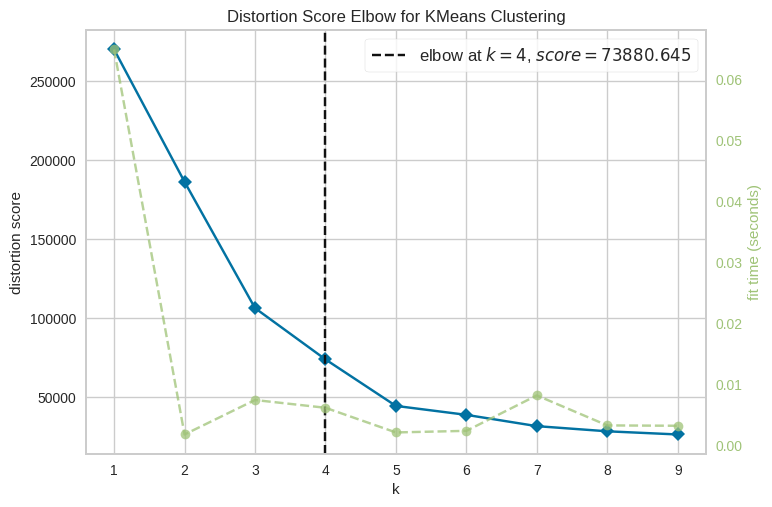

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

**Hasil Analisis Metode Elbow**

Hasil analisis metode elbow menunjukkan bahwa:

* **Jumlah cluster optimal:** 4
* **Nilai total within-cluster sum of squares (WCSS):** 73,679.789

**Interpretasi:**

Membagi data menjadi 4 cluster memberikan keseimbangan terbaik antara meminimalkan jarak di dalam cluster dan memaksimalkan jarak antar cluster.

# Cluster Modeling (K-Means Clustering)

**Analisis Karakteristik Cluster**

Dalam kode ini, kita melakukan analisis karakteristik cluster setelah melatih model `KMeans` dengan jumlah cluster yang telah ditetapkan, yaitu 4.

Pertama, kita menginisialisasi model `KMeans` dengan parameter `n_clusters=4` dan `random_state=0` untuk memastikan hasil yang konsisten. Setelah melatih model dengan data `X`, kita memperoleh label cluster untuk setiap titik data.

Fungsi `analyze_clusters` kemudian digunakan untuk menganalisis karakteristik dari setiap cluster. Fungsi ini mengambil data dari masing-masing cluster berdasarkan label yang diberikan oleh model. Untuk setiap cluster, fungsi ini menghitung dan menampilkan statistik deskriptif seperti rata-rata, median, dan standar deviasi untuk setiap fitur dalam dataset.

In [11]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 4

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_income = cluster_data[:, 0].mean()  # Rata-rata Annual Income
        mean_spending = cluster_data[:, 1].mean()  # Rata-rata Spending Score

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Annual Income (k$): {mean_income:.2f}")
        print(f"Rata-rata Spending Score (1-100): {mean_spending:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Annual Income (k$): 48.26
Rata-rata Spending Score (1-100): 56.48

Cluster 2:
Rata-rata Annual Income (k$): 86.54
Rata-rata Spending Score (1-100): 82.13

Cluster 3:
Rata-rata Annual Income (k$): 87.00
Rata-rata Spending Score (1-100): 18.63

Cluster 4:
Rata-rata Annual Income (k$): 26.30
Rata-rata Spending Score (1-100): 20.91


**Visualisasi Hasil Clustering KMeans**

Dalam kode ini, kita melakukan visualisasi hasil clustering yang telah dilakukan dengan model `KMeans` serta menampilkan posisi centroid dari setiap cluster.

Pertama, kita menentukan posisi centroid dengan menggunakan atribut `cluster_centers_` dari model `KMeans`.

**Visualisasi:**

* **Scatter Plot:** Visualisasi dimulai dengan plot scatter untuk menampilkan data pelanggan.
    * Data pelanggan yang telah dikelompokkan ke dalam cluster ditampilkan dengan warna berbeda untuk setiap cluster berdasarkan label yang diberikan.
* **Centroid:** Centroid dari setiap cluster digambarkan dengan marker 'X' berwarna merah dan ukuran yang lebih besar.
    * Label ditambahkan pada setiap centroid untuk menandai cluster yang diwakilinya.

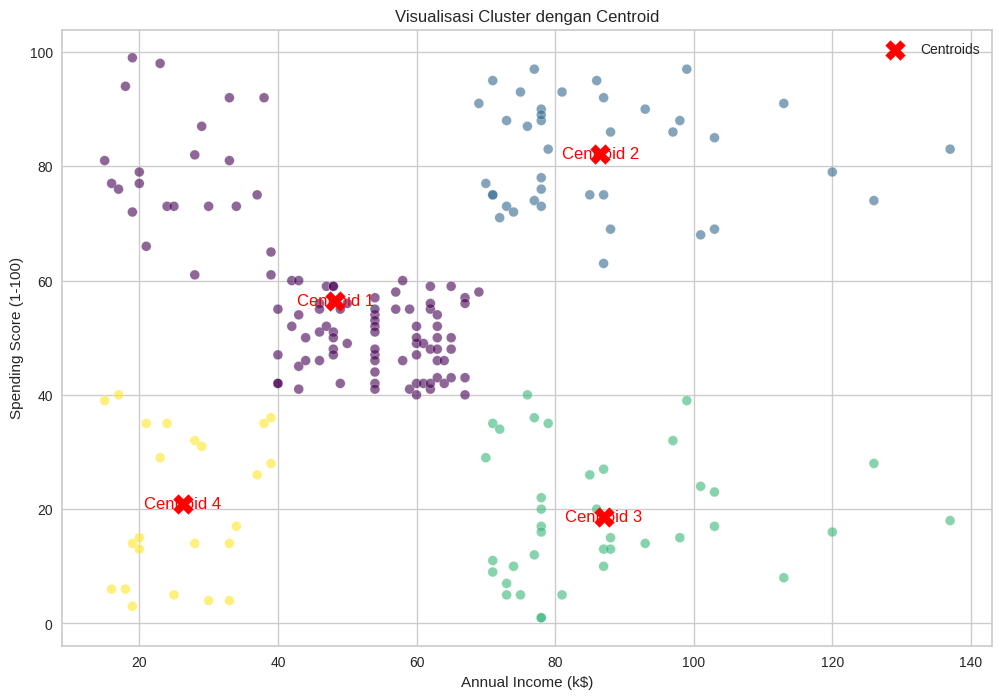

Nilai Centroids:
Centroid 1: Annual Income = 48.26, Spending Score = 56.48
Centroid 2: Annual Income = 86.54, Spending Score = 82.13
Centroid 3: Annual Income = 87.00, Spending Score = 18.63
Centroid 4: Annual Income = 26.30, Spending Score = 20.91


In [12]:
import matplotlib.pyplot as plt

# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

**Karakteristik Cluster berdasarkan Centroid**

Nilai centroid untuk setiap cluster memberikan gambaran tentang karakteristik pelanggan dalam cluster tersebut:

| Cluster | Pendapatan Tahunan | Skor Belanja | Karakteristik |
|---|---|---|---|
| 1 | \$48,260 | 56.48 | Pendapatan menengah, belanja tinggi |
| 2 | \$86,540 | 82.13 | Pendapatan tinggi, belanja intensif |
| 3 | \$87,000 | 18.63 | Pendapatan tinggi, belanja sedikit |
| 4 | \$26,300 | 20.91 | Pendapatan rendah, belanja rendah |

**Kesimpulan:**

Tabel di atas memberikan gambaran umum tentang karakteristik setiap cluster berdasarkan nilai centroid untuk pendapatan tahunan dan skor belanja.